In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-22 01:04:07.515851: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('/Users/caihanzhe/Desktop/Python/Comoros/Vggish_1/df_1min_aver.csv')

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,UMAP2,day_night,NDVI,Forest_Cover,alt,alt_level,PC1,PC2,PC3,PC4
0,38.888889,137.031746,110.269841,0.000000,37.666667,120.412698,159.714286,151.015873,255.000000,169.174603,...,0.637054,Day,0.277405,Medium,966,Medium,588.122841,-150.643614,-69.904351,-116.277808
1,36.467742,135.967742,113.370968,0.000000,47.016129,120.967742,155.483871,151.338710,255.000000,169.112903,...,0.659825,Day,0.277405,Medium,966,Medium,594.027421,-149.896630,-68.996522,-97.658956
2,50.516129,120.145161,117.758065,0.822581,53.483871,112.741935,144.225806,138.419355,255.000000,167.903226,...,0.662284,Day,0.277405,Medium,966,Medium,570.505040,-136.270620,-101.349183,-127.982788
3,42.387097,130.145161,113.193548,0.000000,43.661290,117.822581,155.596774,146.709677,255.000000,171.951613,...,0.666300,Day,0.277405,Medium,966,Medium,584.096910,-143.785425,-68.344157,-118.058371
4,36.258065,139.677419,107.241935,0.000000,31.516129,123.903226,157.887097,155.500000,255.000000,166.435484,...,0.607251,Day,0.277405,Medium,966,Medium,603.064680,-147.951043,-57.632331,-112.796118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,44.190476,108.238095,135.301587,2.920635,86.841270,158.444444,72.952381,153.714286,252.904762,143.158730,...,2.880765,Night,0.309687,Medium,1471,High,296.971214,-50.024338,-75.970444,94.870899
5731,60.967742,86.612903,144.032258,6.903226,114.096774,137.370968,57.822581,147.161290,247.370968,148.290323,...,3.328473,Night,0.309687,Medium,1471,High,179.029618,70.040027,-43.066907,119.373470
5732,58.064516,89.306452,139.258065,3.209677,111.129032,136.129032,65.193548,146.306452,250.274194,150.112903,...,3.158213,Night,0.309687,Medium,1471,High,252.059800,40.745751,-11.955444,99.206163
5733,49.612903,103.725806,139.838710,2.161290,110.838710,144.983871,79.435484,148.887097,252.725806,138.419355,...,3.001862,Night,0.309687,Medium,1471,High,282.854951,24.450228,-52.378269,135.846809


In [4]:
data_select = data.iloc[:, :128].values

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_select)

In [6]:
reducer = umap.UMAP(random_state=42)
data_2d = reducer.fit_transform(data_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [7]:
data['UMAP1'] = data_2d[:, 0]
data['UMAP2'] = data_2d[:, 1]

In [4]:
## Affinity Propagation
## keep results
# AP_results = []
# sites = data['site_code'].unique()
## Apply affinity propagation to all site
# for site in sites:
#     site_data = data[data['site_code'] == site]

    # get UMAP data
X = data[['UMAP1', 'UMAP2']]

    # do affnity propagation
affinity_propagation = AffinityPropagation(
                                            damping=0.7,max_iter = 100, 
                                            convergence_iter= 10,
                                            affinity='euclidean',
                                            random_state = 42).fit(X)
labels = affinity_propagation.labels_

    # get number of clusters
num_clusters = len(set(labels))

    # get Silhouette Score
#     if num_clusters > 1:
#         silhouette_avg = silhouette_score(X, labels)
#     else:
#         silhouette_avg = float('0')  #  if there is only one clutser, print 0

    # save results
#    AP_results.append({'site': site, 'num_clusters': num_clusters, 'silhouette_score': silhouette_avg})

# save results to csv
# AP_results = pd.DataFrame(AP_results)
# AP_results.to_csv('/Users/caihanzhe/Desktop/Python/Comoros/Vggish_1/Vggish_AP_results.csv', index=False)

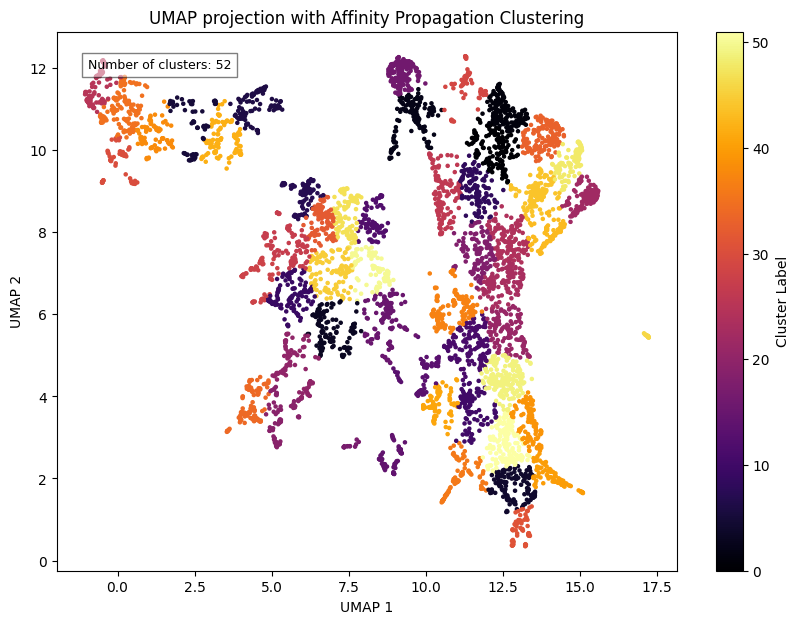

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(data['UMAP1'], data['UMAP2'], c=labels, cmap='inferno', s=5)
plt.colorbar(label='Cluster Label')
plt.text(0.05, 0.95, f'Number of clusters: {num_clusters}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.title('UMAP projection with Affinity Propagation Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()